In [34]:
import os
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np

In [35]:
# !pip install BeautifulSoup

# Data Parsing and Importing


In [36]:
DATA_DIR = "/content/drive/MyDrive/Colab Notebooks/Basketball Analytics Project/data"

In [37]:
seasons = os.listdir(DATA_DIR)

In [38]:
def parse_html(season):
  with open(season) as f:
    html = f.read()

  soup = BeautifulSoup(html)
  soup.select("table.pgl_basic")
  return soup

In [39]:
def read_line_stat(soup):
  line_stat = pd.read_html(str(soup), attrs={"id": "pgl_basic"})[0]

In [40]:
df = pd.DataFrame()
for season in seasons:
  if season.isdigit():
    season_path = os.path.join(DATA_DIR, season)
    soup = parse_html(season_path)
    season_df = pd.read_html(str(soup), attrs={"id": "pgl_basic"})[0]
    season_df["Season"] = np.full((len(season_df),), season)
    df = df.append(season_df, ignore_index=True)

<ipython-input-40-c6cebfd9fe50>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(season_df, ignore_index=True)
<ipython-input-40-c6cebfd9fe50>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(season_df, ignore_index=True)
<ipython-input-40-c6cebfd9fe50>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(season_df, ignore_index=True)
<ipython-input-40-c6cebfd9fe50>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(season_df, ignore_index=True)
<ipython-input-40-c6cebfd9fe50>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

In [41]:
df

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,Season
0,1,1,2014-10-29,26-229,GSW,@,SAC,W (+18),1,36:32,...,10,5,6,0,4,5,24,21.4,+20,2015
1,2,2,2014-11-01,26-232,GSW,NaN,LAL,W (+23),1,34:06,...,5,10,3,0,2,3,31,30.0,+30,2015
2,3,3,2014-11-02,26-233,GSW,@,POR,W (+5),1,30:50,...,5,6,2,0,3,1,21,15.5,+12,2015
3,4,4,2014-11-05,26-236,GSW,NaN,LAC,W (+17),1,33:49,...,6,7,1,0,5,4,28,20.1,+21,2015
4,5,5,2014-11-08,26-239,GSW,@,HOU,W (+11),1,39:58,...,9,5,4,0,5,2,34,30.7,+13,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,79,53,2023-04-02,35-019,GSW,@,DEN,L (-2),1,36:53,...,3,4,0,2,3,1,21,6.7,-5,2023
741,80,54,2023-04-04,35-021,GSW,NaN,OKC,W (+11),1,36:46,...,5,6,1,0,0,3,34,26.4,+14,2023
742,Rk,G,Date,Age,Tm,NaN,Opp,NaN,GS,MP,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,2023
743,81,55,2023-04-07,35-024,GSW,@,SAC,W (+22),1,32:41,...,7,6,2,1,5,1,25,22.0,+33,2023


In [42]:
df.columns

Index(['Rk', 'G', 'Date', 'Age', 'Tm', 'Unnamed: 5', 'Opp', 'Unnamed: 7', 'GS',
       'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-',
       'Season'],
      dtype='object')

# Data Preprocessing

In [43]:
# Remove insignificant columns:

# These features should not contextually effect the target

df = df.drop(columns=['Rk', 'GS', 'Date', 'Tm', 'STL', 'BLK'], axis=1)


# These features are removed to reduce collinearity
df = df.drop(columns=['FG', '3P', 'FT', 'DRB'] , axis=1)

df.columns

Index(['G', 'Age', 'Unnamed: 5', 'Opp', 'Unnamed: 7', 'MP', 'FGA', 'FG%',
       '3PA', '3P%', 'FTA', 'FT%', 'ORB', 'TRB', 'AST', 'TOV', 'PF', 'PTS',
       'GmSc', '+/-', 'Season'],
      dtype='object')

In [44]:
# Change the name of the column at index 5 to 'Home'
df = df.rename(columns={'Unnamed: 5': 'Home'})
df['Home'] = df['Home'].isna().fillna(1).map({True: 1, False: 0})

# Split the 'Unnamed: 7' column into two separate columns
df[['Win/Loss', 'Diff']] = df['Unnamed: 7'].str.extract(r'(\w)\s\(([-+]?\d+)\)')

# Remove the original column
df = df.drop('Unnamed: 7', axis=1)

In [45]:
df.columns

Index(['G', 'Age', 'Home', 'Opp', 'MP', 'FGA', 'FG%', '3PA', '3P%', 'FTA',
       'FT%', 'ORB', 'TRB', 'AST', 'TOV', 'PF', 'PTS', 'GmSc', '+/-', 'Season',
       'Win/Loss', 'Diff'],
      dtype='object')

In [46]:
# Remove the rows where player did not play
df = df[df['MP'] != 'Did Not Dress']
df = df[df['MP'] != 'Did Not Play']
df = df[df['MP'] != 'MP']
df = df[df['MP'] != 'Inactive']

# Convert columns to numeric
cols_to_convert = ['G', 'PTS', 'FGA', 'FG%', '3PA', '3P%', 'FTA', 'FT%', \
                   'ORB', 'TRB', 'AST', 'TOV', 'PF', 'GmSc', '+/-', 'Season']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert 'Opp' to numeric categorical
opp_mapping = {opp: i for i, opp in enumerate(df['Opp'].unique())}
df['Opp'] = df['Opp'].map(opp_mapping)

# Convert '+/-' to int
df['+/-'] = df['+/-'].apply(lambda x: int(x))

# Convert 'Diff' to int
df['Diff'] = df['Diff'].apply(lambda x: int(x))

# Convert 'Win/Loss' to numeric categorical
wl_mapping = {'W': 1, 'L': 0}
df['Win/Loss'] = df['Win/Loss'].map(wl_mapping)

# Remove rows with non-numeric 'Age' entries
# Convert 'Age' to just 'Years'
df['Age'] = df['Age'].apply(lambda x: int(x.split('-')[0]))

# Now convert 'MP' to minutes
df['MP'] = df['MP'].apply(lambda x: int(x.split(':')[0]) + int(x.split(':')[1])/60)

# Remove any remaining NaN values
df.dropna(inplace=True)

# Feature Engineering

In [47]:
# Add a column which keeps track of the average stats in the last 3 games
df['Avg_PTS_Last_3_Games'] = df['PTS'].rolling(window=3).mean()
df['Avg_PTS_Last_3_Games'] = df['Avg_PTS_Last_3_Games'].apply(lambda x: float(x))

df['Avg_MP_Last_3_Games'] = df['MP'].rolling(window=3).mean()
df['Avg_FGA_Last_3_Games'] = df['FGA'].rolling(window=3).mean()
df['Avg_FG%_Last_3_Games'] = df['FG%'].rolling(window=3).mean()
df['Avg_3PA_Last_3_Games'] = df['3PA'].rolling(window=3).mean()
df['Avg_3P%_Last_3_Games'] = df['3P%'].rolling(window=3).mean()
df['Avg_FTA_Last_3_Games'] = df['FTA'].rolling(window=3).mean()
df['Avg_FT%_Last_3_Games'] = df['FT%'].rolling(window=3).mean()
df['Avg_ORB_Last_3_Games'] = df['ORB'].rolling(window=3).mean()
df['Avg_TRB_Last_3_Games'] = df['TRB'].rolling(window=3).mean()
df['Avg_AST_Last_3_Games'] = df['AST'].rolling(window=3).mean()
df['Avg_TOV_Last_3_Games'] = df['TOV'].rolling(window=3).mean()
df['Avg_PF_Last_3_Games'] = df['PF'].rolling(window=3).mean()
df['Avg_GmSc_Last_3_Games'] = df['GmSc'].rolling(window=3).mean()
df['Avg_+/-_Last_3_Games'] = df['+/-'].rolling(window=3).mean()
df['Avg_Win/Loss_Last_3_Games'] = df['Win/Loss'].rolling(window=3).mean()
df['Avg_Diff_Last_3_Games'] = df['Diff'].rolling(window=3).mean()


In [48]:
# Remove single game stats except for points:

df = df.drop(columns=['MP', 'FGA', 'FG%', '3PA', '3P%', 'FTA', 'FT%', 'ORB', \
                      'TRB', 'AST', 'TOV', 'PF', 'GmSc', '+/-', 'Win/Loss', 'Diff'])

In [49]:
df.columns

Index(['G', 'Age', 'Home', 'Opp', 'PTS', 'Season', 'Avg_PTS_Last_3_Games',
       'Avg_MP_Last_3_Games', 'Avg_FGA_Last_3_Games', 'Avg_FG%_Last_3_Games',
       'Avg_3PA_Last_3_Games', 'Avg_3P%_Last_3_Games', 'Avg_FTA_Last_3_Games',
       'Avg_FT%_Last_3_Games', 'Avg_ORB_Last_3_Games', 'Avg_TRB_Last_3_Games',
       'Avg_AST_Last_3_Games', 'Avg_TOV_Last_3_Games', 'Avg_PF_Last_3_Games',
       'Avg_GmSc_Last_3_Games', 'Avg_+/-_Last_3_Games',
       'Avg_Win/Loss_Last_3_Games', 'Avg_Diff_Last_3_Games'],
      dtype='object')

In [50]:
df = df.reset_index(drop=True)
df

,G,Age,Home,Opp,PTS,Season,Avg_PTS_Last_3_Games,Avg_MP_Last_3_Games,Avg_FGA_Last_3_Games,Avg_FG%_Last_3_Games,...,Avg_FT%_Last_3_Games,Avg_ORB_Last_3_Games,Avg_TRB_Last_3_Games,Avg_AST_Last_3_Games,Avg_TOV_Last_3_Games,Avg_PF_Last_3_Games,Avg_GmSc_Last_3_Games,Avg_+/-_Last_3_Games,Avg_Win/Loss_Last_3_Games,Avg_Diff_Last_3_Games
0,1,26,0,0,24,2015,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,26,1,1,31,2015,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,26,0,2,21,2015,25.333333,33.822222,18.000000,0.423667,...,0.963000,0.666667,6.666667,7.000000,3.000000,3.000000,22.300000,20.666667,1.000000,15.333333
3,4,26,1,3,28,2015,26.666667,32.916667,18.333333,0.453000,...,1.000000,0.333333,5.333333,7.666667,3.333333,2.666667,21.866667,21.000000,1.000000,15.000000
4,5,26,0,4,34,2015,27.666667,34.872222,18.333333,0.505667,...,1.000000,0.666667,6.666667,6.000000,4.333333,2.333333,22.100000,15.333333,1.000000,11.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,52,35,1,6,33,2023,33.666667,36.033333,21.333333,0.546667,...,0.875000,1.000000,6.000000,5.333333,2.333333,1.000000,27.333333,9.666667,1.000000,11.333333
495,53,35,0,23,21,2023,31.000000,35.516667,24.666667,0.456667,...,0.916667,1.333333,4.333333,5.666667,2.666667,0.666667,22.333333,1.333333,0.666667,8.000000
496,54,35,1,10,34,2023,29.333333,35.455556,24.666667,0.416667,...,1.000000,0.666667,3.333333,5.000000,1.333333,1.666667,19.633333,2.000000,0.666667,8.000000
497,55,35,0,0,25,2023,26.666667,35.444444,22.333333,0.432333,...,0.952333,0.666667,5.000000,5.333333,2.666667,1.666667,18.366667,14.000000,0.666667,10.333333


# Data Split

In [51]:
# Drop first two rows
df = df[2:]

# Split data into features ('x') and targets ('y')
X = df.drop(columns=['PTS'])
y = df['PTS']

In [52]:
print(f'features (X): \n{X}')
print(f'targets (y): \n{y}')

features (X): 
      G  Age  Home  Opp  Season  Avg_PTS_Last_3_Games  Avg_MP_Last_3_Games  \
2     3   26     0    2    2015             25.333333            33.822222   
3     4   26     1    3    2015             26.666667            32.916667   
4     5   26     0    4    2015             27.666667            34.872222   
5     6   26     0    5    2015             30.000000            35.950000   
6     7   26     1    6    2015             26.000000            36.600000   
..   ..  ...   ...  ...     ...                   ...                  ...   
494  52   35     1    6    2023             33.666667            36.033333   
495  53   35     0   23    2023             31.000000            35.516667   
496  54   35     1   10    2023             29.333333            35.455556   
497  55   35     0    0    2023             26.666667            35.444444   
498  56   35     0    2    2023             28.333333            30.633333   

     Avg_FGA_Last_3_Games  Avg_FG%_Last_3_Games 

In [53]:
# Calculate the split indices
split_index_1 = int(len(df) * 0.6)
split_index_2 = int(len(df) * 0.8)

# Split the features
X_train = X[:split_index_1]
X_val = X[split_index_1:split_index_2]
X_test = X[split_index_2:]

# Split the targets
y_train = y[:split_index_1]
y_val = y[split_index_1:split_index_2]
y_test = y[split_index_2:]

# Exploratory Data Analysis

(array([14., 19., 54., 58., 54., 49., 19., 18.,  7.,  6.]),
 array([ 9. , 13.4, 17.8, 22.2, 26.6, 31. , 35.4, 39.8, 44.2, 48.6, 53. ]),
 <BarContainer object of 10 artists>)

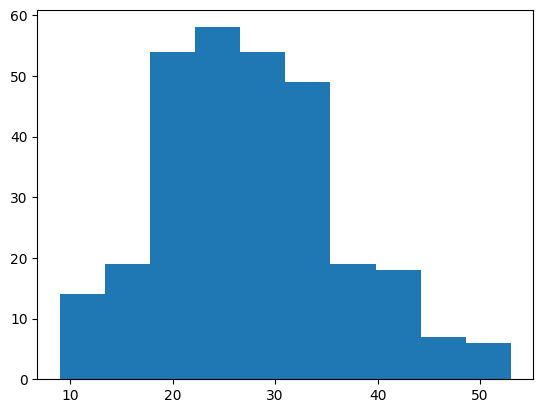

In [54]:
import matplotlib.pyplot as plt

# Let's take a look at the distribution of points scored
plt.hist(y_train)

Text(0.5, 1.0, 'Scatter Plot of Points Scored on Opponent')

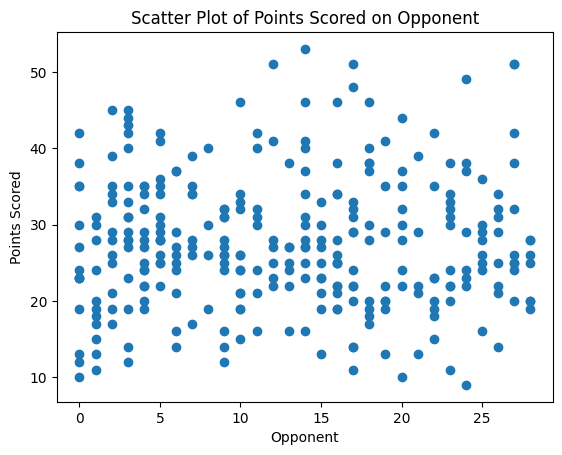

In [55]:
plt.scatter(X_train['Opp'], y_train)

# Scatterplot of points scored against each team
plt.xlabel('Opponent')
plt.ylabel('Points Scored')
plt.title('Scatter Plot of Points Scored on Opponent')

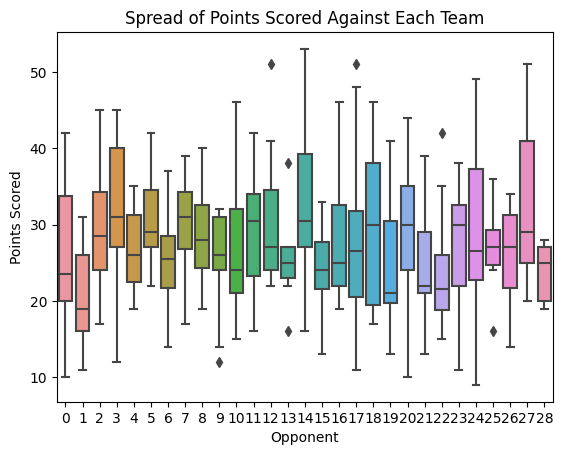

In [56]:
import seaborn as sns

fig, ax = plt.subplots()

sns.boxplot(df, y=y_train, x=X_train['Opp'])

plt.xlabel('Opponent')
plt.ylabel('Points Scored')
plt.title('Spread of Points Scored Against Each Team')

plt.show()

# Training and Model Selection

In [57]:
df

,G,Age,Home,Opp,PTS,Season,Avg_PTS_Last_3_Games,Avg_MP_Last_3_Games,Avg_FGA_Last_3_Games,Avg_FG%_Last_3_Games,...,Avg_FT%_Last_3_Games,Avg_ORB_Last_3_Games,Avg_TRB_Last_3_Games,Avg_AST_Last_3_Games,Avg_TOV_Last_3_Games,Avg_PF_Last_3_Games,Avg_GmSc_Last_3_Games,Avg_+/-_Last_3_Games,Avg_Win/Loss_Last_3_Games,Avg_Diff_Last_3_Games
2,3,26,0,2,21,2015,25.333333,33.822222,18.000000,0.423667,...,0.963000,0.666667,6.666667,7.000000,3.000000,3.000000,22.300000,20.666667,1.000000,15.333333
3,4,26,1,3,28,2015,26.666667,32.916667,18.333333,0.453000,...,1.000000,0.333333,5.333333,7.666667,3.333333,2.666667,21.866667,21.000000,1.000000,15.000000
4,5,26,0,4,34,2015,27.666667,34.872222,18.333333,0.505667,...,1.000000,0.666667,6.666667,6.000000,4.333333,2.333333,22.100000,15.333333,1.000000,11.000000
5,6,26,0,5,28,2015,30.000000,35.950000,19.000000,0.561333,...,1.000000,0.333333,5.666667,7.333333,6.666667,3.666667,23.133333,9.333333,0.666667,5.333333
6,7,26,1,6,16,2015,26.000000,36.600000,19.000000,0.524333,...,1.000000,0.333333,5.666667,6.666667,6.000000,3.000000,19.000000,-3.666667,0.333333,-4.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,52,35,1,6,33,2023,33.666667,36.033333,21.333333,0.546667,...,0.875000,1.000000,6.000000,5.333333,2.333333,1.000000,27.333333,9.666667,1.000000,11.333333
495,53,35,0,23,21,2023,31.000000,35.516667,24.666667,0.456667,...,0.916667,1.333333,4.333333,5.666667,2.666667,0.666667,22.333333,1.333333,0.666667,8.000000
496,54,35,1,10,34,2023,29.333333,35.455556,24.666667,0.416667,...,1.000000,0.666667,3.333333,5.000000,1.333333,1.666667,19.633333,2.000000,0.666667,8.000000
497,55,35,0,0,25,2023,26.666667,35.444444,22.333333,0.432333,...,0.952333,0.666667,5.000000,5.333333,2.666667,1.666667,18.366667,14.000000,0.666667,10.333333


## Lasso Regression (L1 Penalty)

In [58]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

<ipython-input-59-c60f601d5e6e>:12: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.398e+03, tolerance: 2.269e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


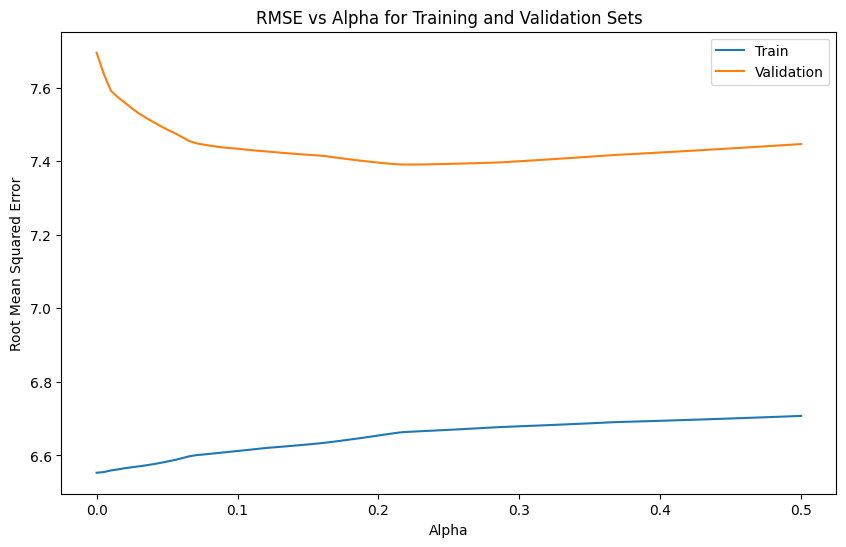

Optimal Alpha Value: 0.22222222222222224
Lowest Validation RMSE: 7.390895958059687


0.22222222222222224

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

def tune_alpha(X_train, y_train, X_val, y_val, alphas):
    train_errors = []
    val_errors = []

    for alpha in alphas:
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train, y_train)

        y_train_pred = lasso.predict(X_train)
        y_val_pred = lasso.predict(X_val)

        train_error = np.sqrt(mean_squared_error(y_train, y_train_pred))
        val_error = np.sqrt(mean_squared_error(y_val, y_val_pred))

        train_errors.append(train_error)
        val_errors.append(val_error)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(alphas, train_errors, label='Train')
    plt.plot(alphas, val_errors, label='Validation')
    plt.xlabel('Alpha')
    plt.ylabel('Root Mean Squared Error')
    plt.legend()
    plt.title('RMSE vs Alpha for Training and Validation Sets')
    plt.show()

    optimal_alpha = alphas[np.argmin(val_errors)]

    print(f"Optimal Alpha Value: {optimal_alpha}")
    print(f"Lowest Validation RMSE: {min(val_errors)}")

    return optimal_alpha


# Define the range of alphas to test
alphas = np.linspace(0, 0.5, 100)

# Call the function
tune_alpha(X_train_scaled, y_train, X_val_scaled, y_val, alphas)


## Random Forest


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def tune_rf(X_train, y_train, X_val, y_val):
    # Define the hyperparameters to tune
    hyperparameters = {
        'n_estimators': [50, 100, 150, 200],
        'max_depth': [None, 5, 10, 15, 20]
    }

    # Initialize the random forest regressor
    rf = RandomForestRegressor(random_state=42)

    # Initialize GridSearchCV
    grid_search = GridSearchCV(rf, hyperparameters, cv=5, scoring='neg_mean_squared_error')

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_

    # Train a new random forest with the best parameters
    best_rf = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                    max_depth=best_params['max_depth'],
                                    random_state=42)
    best_rf.fit(X_train, y_train)

    # Calculate validation MSE
    y_val_pred = best_rf.predict(X_val)
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

    print(f"Validation RMSE: {val_rmse}")
    print(f"Best parameters: {best_params}")

    return best_rf

# Call the function
best_rf = tune_rf(X_train, y_train, X_val, y_val)


Validation RMSE: 7.65325873940008
Best parameters: {'max_depth': 5, 'n_estimators': 100}


## Boosted Tree

In [61]:
# !pip install xgboost

In [62]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

def tune_xgb(X_train, y_train, X_val, y_val):
    # Define the parameter grid
    param_grid = {
        'n_estimators': range(50, 400, 50),
        'max_depth': range(3, 10, 2),
    }

    # Initialize the XGBoost Regressor
    xgb = XGBRegressor(random_state=42)

    # Initialize the GridSearchCV
    grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

    # Fit the GridSearchCV
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_

    # Fit the model with the best parameters on the validation set
    xgb_best = XGBRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
    xgb_best.fit(X_train, y_train)

    # Predict on the validation set
    y_pred_val = xgb_best.predict(X_val)

    # Get the mean squared error
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

    return best_params, rmse

best_params, rmse = tune_xgb(X_train, y_train, X_val, y_val)
print(f'Best Parameters: {best_params}, Lowest Validation RMSE: {rmse}')


Best Parameters: {'max_depth': 3, 'n_estimators': 50}, Lowest Validation RMSE: 7.931560293706156


In [63]:
X.columns

Index(['G', 'Age', 'Home', 'Opp', 'Season', 'Avg_PTS_Last_3_Games',
       'Avg_MP_Last_3_Games', 'Avg_FGA_Last_3_Games', 'Avg_FG%_Last_3_Games',
       'Avg_3PA_Last_3_Games', 'Avg_3P%_Last_3_Games', 'Avg_FTA_Last_3_Games',
       'Avg_FT%_Last_3_Games', 'Avg_ORB_Last_3_Games', 'Avg_TRB_Last_3_Games',
       'Avg_AST_Last_3_Games', 'Avg_TOV_Last_3_Games', 'Avg_PF_Last_3_Games',
       'Avg_GmSc_Last_3_Games', 'Avg_+/-_Last_3_Games',
       'Avg_Win/Loss_Last_3_Games', 'Avg_Diff_Last_3_Games'],
      dtype='object')

# Test Error

<ipython-input-59-c60f601d5e6e>:12: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.398e+03, tolerance: 2.269e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


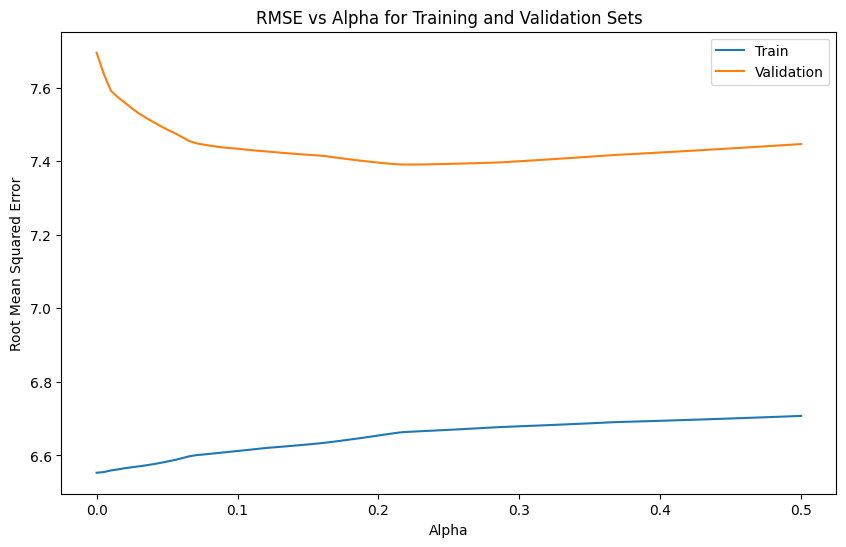

Optimal Alpha Value: 0.22222222222222224
Lowest Validation RMSE: 7.390895958059687
Test Error (RMSE): 7.329921460014798


In [64]:
alphas = np.linspace(0, 0.5, 100)
optimal_alpha = tune_alpha(X_train_scaled, y_train, X_val_scaled, y_val, alphas)

# Train the Lasso model using the optimal alpha
lasso = Lasso(alpha=optimal_alpha)
lasso.fit(X_train, y_train)

# Predict the target variable for the test set
y_test_pred = lasso.predict(X_test)

# Calculate the RMSE for the test set predictions
test_error = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Test Error (RMSE): {test_error}')